# Module 1 - Project 2 - Sprint 3 and 4

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from numpy import mean
from numpy import std

from scipy.stats import stats
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

from sklearn.datasets import make_classification

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

from sklearn.pipeline import Pipeline

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm

import warnings



dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier()
knc = KNeighborsClassifier(n_neighbors=7)
gnb = GaussianNB()
svc = svm.LinearSVC(random_state=800)






In [2]:



# Importing the red and white wine CSV from the folder "Wine Quality" in the folder of this project.

red_wine = pd.read_csv('Wine Quality/winequality-red.csv', sep=";") 

# Setting DPI for better images
plt.rcParams['figure.dpi'] = 72  
plt.rcParams['savefig.dpi'] = 72


# red_wine.tail()



# Creating categories of Low, Medium and High and then encoding them for ML.
## Initially I created the low, medium and high, then encoded it to create a new column after which I dropped the columns Quality Label and the original Quality. But I thought it was redundant to do two steps instead of one which is to instead create low = 0, medium = 1, high = 2. That way it's all clean and tidy.
'0_low' if value <= 5 
else '1_med' if value <= 7 
else '2_hig')



0 = 0_low = 0 - 5

1 = 1_med = 6 - 7

2 = 2_hig = 7 - 9

In [3]:
# Red Wine
# we are creating a new column called "quality_label", we define a range and associate that range with a label
red_wine['quality_range'] = red_wine['quality'].apply(lambda value: '0' if value <= 5 
else '1' if value <= 7 
else '2')
# Convert column to integer.
red_wine["quality_range"]=red_wine['quality_range'].astype(str).astype(int)



In [ ]:
# Drop the column quality. 
red_wine = red_wine.drop(columns="quality")

In [4]:
red_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
 12  quality_range         1599 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 162.5 KB


In [ ]:
# # Depracated step to the process. This step assumed that the quality was categorized to low, medium and high. 
# 
# 
# # Label encoding the quality label
# # Create instance of LabelEncoder
# le = LabelEncoder()
# 
# # Assign numerical value and stores into a variable "quality_encoded"
# red_wine["quality_encoded"] = le.fit_transform(red_wine["quality_label"])




/Users/elysium/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/elysium/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/Users/elysium/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/elysium

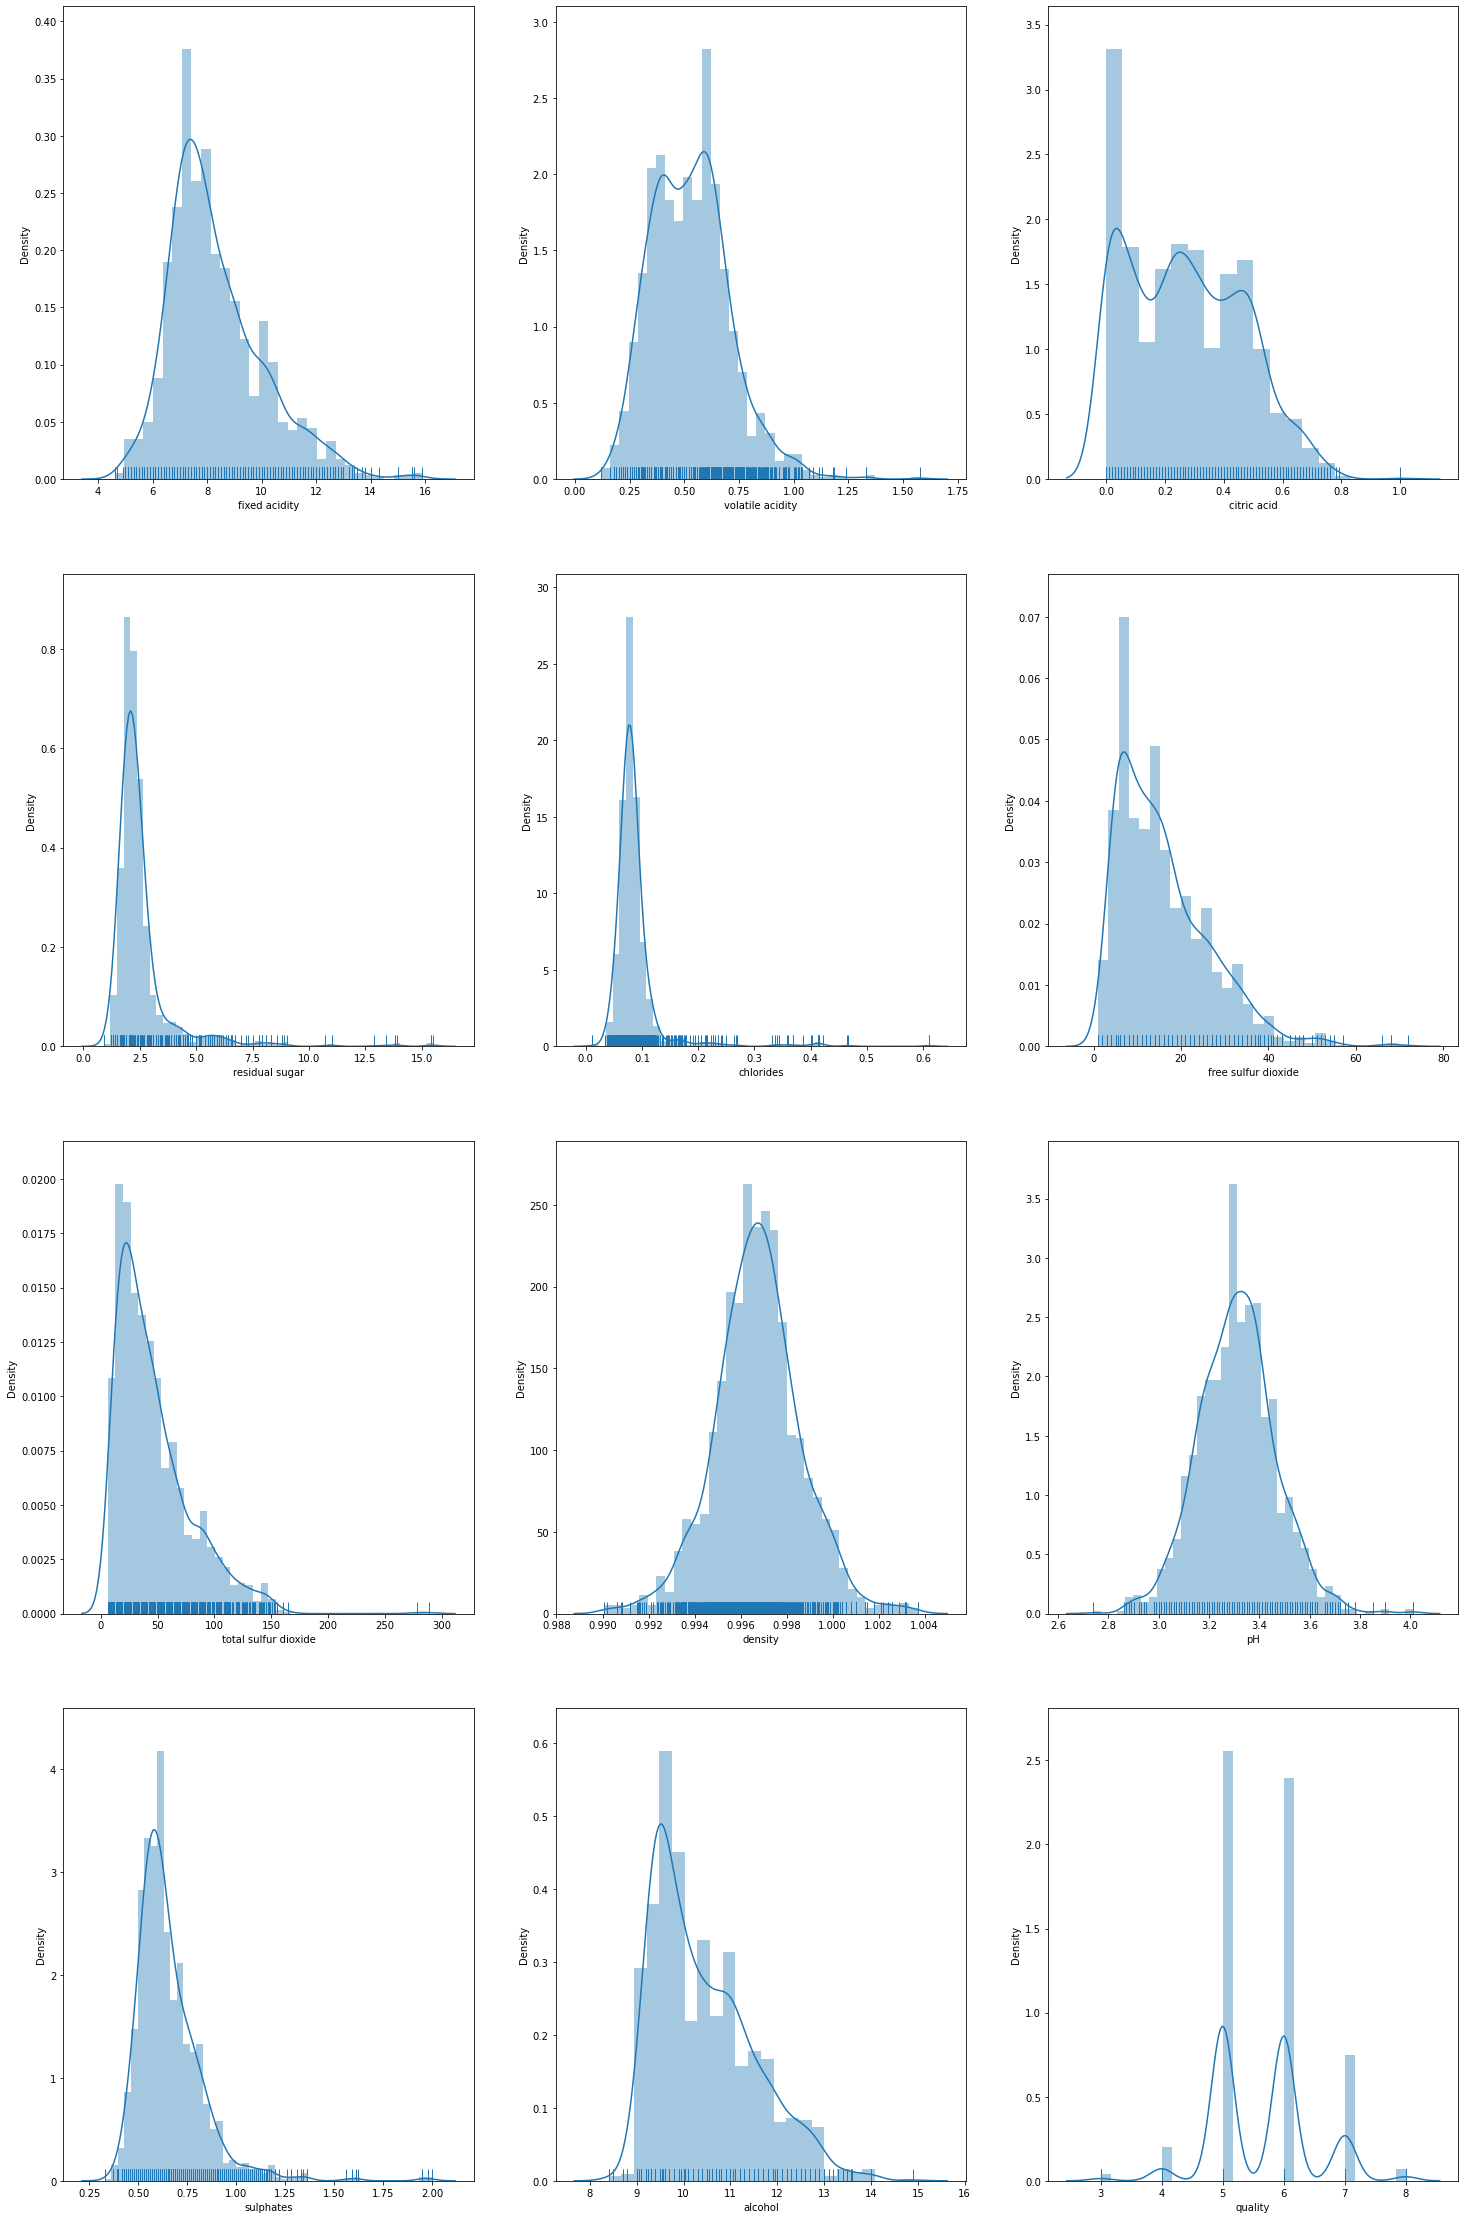

In [6]:
fig, ax = plt.subplots(4, 3, figsize=(25, 40))
k = 0
col = red_wine.columns
for i in range(4):
  for j in range(3):

    sns.distplot(red_wine[col[k]], rug=True, axlabel=col[k], ax=ax[i][j])
    k += 1

In [ ]:
red_wine.head()

# Splitting data for testing and training. 

## Split dataframe to features and prediction, X and y

In [5]:
y = red_wine.quality_range # --> what you're trying to predict
X = red_wine.drop(columns=["quality_range", "quality"]) # --> the features we will keep to build our model
display(X.head())
display(y.head())

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


0    0
1    0
2    0
3    1
4    0
Name: quality_range, dtype: int64

In [ ]:
# Create StratifiedKFold object.
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

lst_accu_strat = []


In [ ]:

# define dataset
#X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=99)
# define the pipeline
steps = list()
steps.append(('scaler', MinMaxScaler()))
steps.append(('model', LogisticRegression()))
pipeline = Pipeline(steps=steps)
# define the evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate the model using cross-validation
scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores)*100, std(scores)*100))

In [ ]:

# define dataset
#X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=99)
# define the pipeline
steps = list()
steps.append(('scaler', MinMaxScaler()))
steps.append(('model', LogisticRegression()))
pipeline = Pipeline(steps=steps)
# define the evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate the model using cross-validation
scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores)*100, std(scores)*100))

In [ ]:



# Example:
# y=red_wine.quality_label
# X.drop(['SalePrice'],axis=1,inplace=True)
display(y)
display(X)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

# display(X_train)
# display(X_test)
# display(y_train)
# display(y_test)


In [ ]:
# data normalisation with sklearn


# fit scaler on training data
norm = MinMaxScaler().fit(X_train)

# transform training data
X_train_norm = norm.fit_transform(X_train)

# transform testing data
X_test_norm = norm.fit_transform(X_test)

display(X_train_norm)

In [ ]:
# Summary of the red_wine dataframe

display(red_wine.info())
display(red_wine.shape)




In [ ]:
# Show list of specific quality
red_wine.loc[(red_wine["quality_label"] == "2_hig")]


In [ ]:
# Total number of wines for each quality

red_wine.value_counts("quality") 

In [ ]:
# Make two new dataframes without the first 3 columns (fixed acidity, volatile acidity, citric acid) of both red_wine and white_wine.

df2 = pd.DataFrame(red_wine.iloc[:,3:])
df2 = pd.DataFrame(df2.describe())
display(df2) 
df3 = pd.DataFrame(white_wine.iloc[:,3:])
df3 = pd.DataFrame(df3.describe())
display(df3) 

# Create a table to compare descriptive stats of both types of wines.

wines_describe = pd.concat([df2, df3], axis=1)

wines_describe = wines_describe.round(decimals = 2)
wines_describe


![Tux, the Linux mascot](https://mdg.imgix.net/assets/images/tux.png?auto=format&fit=clip&q=40&w=100) 
> # Penguin Note
## Make comments on base observations on the two tables above.  


# Starting with MatPlotLib

In [ ]:
# Create a pie chart showing the types of wines.

plt.style.use("fivethirtyeight")

# Convert categories to dict

wines['wine_type'] = pd.Categorical(wines['wine_type'],
categories=['Red', 'White'])

wine_type_dict = list(wines.value_counts("wine_type"))
print(wine_type_dict)

display(wines.wine_type.value_counts().Red)

#Make function to display values instead of percentage on pie chart

def make_autopct(wine_type_dict):
    def my_autopct(pct):
        total = sum(wine_type_dict)
        val = int(round(pct*total/100.0))
        return '{p:.2f}% \n({v:d})'.format(p=pct,v=val)
    return my_autopct

def func(type_of_wine):
  return "{:1.1f}%".format(type_of_wine)
  

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'White Wine', 'Red Wine'
sizes = wines.value_counts("wine_type")
explode = (0, .05)  # only "explode" the 2nd slice 
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
sns.set_style("whitegrid")
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct=make_autopct(wine_type_dict),
        shadow=False, startangle=45, colors= [ "silver", "Red"])
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()







In [ ]:
# Count of each categroy value
display(red_wine['quality'].value_counts())
display(white_wine['quality'].value_counts())

# Count plot of both types of wine and Quality

In [ ]:

plt.figure(figsize=(12,9))
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
sns.set_style("whitegrid")
plots = sns.countplot(wines.quality, hue=wines.wine_type, palette=["red", "silver"])
plt.xlabel('Quality')
plt.ylabel('Count')
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')

## Reordering of the categories to Low, Medium, High

In [ ]:
# Create a dataframe of the counts in quality_label for red_wine 
rw_ql = pd.DataFrame(red_wine.value_counts("quality_label"))

# make an new index
rw_ql = rw_ql.reset_index()  

# change column names
rw_ql.columns = ['quality_label', 'Count for quality_label'] 

# re-order the list to show in the order "low, medium, high" instead of "medium, low, high"
lst = [1, 0, 2]
rw_ql = rw_ql.loc[lst]
rw_ql




In [ ]:

# Bar plot for the quality counts of red_wine
red_wine_quality = rw_ql.plot.bar(x='quality_label', y='Count for quality_label', rot=0,
legend=False, figsize=(8, 6), color="xkcd:reddish orange")
plt.xlabel('Quality')
plt.ylabel('Count')
sns.set_style("white")
plt.title("Red Wine", fontsize=20)
for bar in red_wine_quality.patches:
    red_wine_quality.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')

In [ ]:
# Create a dataframe of the counts in quality_label for white_wine 
ww_ql = pd.DataFrame(white_wine.value_counts("quality_label"))

# make an new index
ww_ql = ww_ql.reset_index()  

# change column names
ww_ql.columns = ['quality_label', 'Count for quality_label'] 

# re-order the list to show in the order "low, medium, high" instead of "medium, low, high"
lst = [1, 0, 2]
ww_ql = ww_ql.loc[lst]
ww_ql




In [ ]:
# Bar plot for the quality counts of white_wine
# matplotlib.pyplot.bar(x, height, width=0.8, bottom=None, *, align='center', data=None, **kwargs)

# plt.bar_label(white_wine_quality.containers[0])
white_wine_quality = ww_ql.plot.bar(x='quality_label', y='Count for quality_label', rot=0, 
legend=False, figsize=(8, 6), color="xkcd:silver")
plt.xlabel('Quality')
plt.ylabel('Count')
sns.set_style("white")
plt.title("White Wine", fontsize=20)
for bar in white_wine_quality.patches:
    white_wine_quality.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')

In [ ]:
# Box plots of all the columns in the dataset.
fix, ax = plt.subplots(ncols = 6, nrows = 2, figsize = (25,20))
index = 0
ax = ax.flatten()

for col, value in wines.items():
    if col != "types":
        sns.boxplot(y = col, data = red_wine, ax = ax[index])
        index += 1